In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

### Data Load

* ppg

In [2]:
ppg_signal_5 = np.load('workspace/new_test_data/ica_ppg_5.npy') # 5 min ppg

In [3]:
len(ppg_signal_5)

1200

In [4]:
ecg_signal_5 = np.load('workspace/new_test_data/ica_ecg_5.npy') # 5 min ecg

In [5]:
len(ecg_signal_5)

1200

* ecg

In [6]:
ecg_lb = np.load('workspace/new_test_data/ica_lb.npy')

In [7]:
ppg_id = np.load('/workspace/new_test_data/ica_id.npy')

In [8]:
len(ppg_id)

1200

In [9]:
ecg_id = np.load('/workspace/new_test_data/ica_id.npy')

* Qualitu Index

* ppg dataframe

In [10]:
df_ppg = pd.DataFrame(list(ppg_signal_5))

In [11]:
df_ppg['caseid'] = list(ppg_id)

In [12]:
ppg_lb = np.load('/workspace/new_test_data/ica_lb.npy')

In [13]:
df_ppg['label'] = list(ppg_lb)

In [14]:
df_ppg = df_ppg.dropna()

In [16]:
df_ppg

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,caseid,label
0,62.438301,62.043301,62.438301,61.648300,61.253300,60.463299,59.278400,57.303501,56.513500,54.933601,...,39.529301,38.344299,37.949299,37.159401,36.369400,35.579399,34.789501,33.999500,1.0,-1.0
1,39.924198,42.689098,44.664001,46.638901,49.008801,50.193802,51.773701,53.353699,54.143600,54.933601,...,54.143600,55.328602,56.118500,56.513500,56.118500,56.908501,56.908501,56.908501,1.0,-1.0
2,23.334999,23.729900,24.519899,25.309900,26.494801,28.074800,30.444599,32.814499,35.579399,37.949299,...,52.168701,52.958698,54.933601,56.513500,56.908501,57.303501,58.093399,58.093399,1.0,0.0
3,57.698502,57.303501,55.723499,54.538601,53.353699,51.773701,49.798801,47.823898,45.453999,43.874100,...,60.463299,59.673401,59.278400,57.698502,56.908501,55.328602,53.748600,51.378700,4.0,0.0
4,26.494801,28.074800,30.049700,32.024601,34.394501,37.159401,40.319199,43.479099,47.033901,50.193802,...,56.118500,55.328602,54.143600,52.563702,51.378700,50.193802,47.823898,45.453999,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,43.874100,43.084099,42.689098,41.899200,41.504200,40.714199,40.319199,39.924198,39.529301,39.529301,...,39.924198,39.924198,39.924198,39.529301,39.529301,39.134300,38.739300,38.739300,742.0,0.0
1196,41.504200,41.109200,41.109200,40.714199,40.319199,39.924198,39.134300,39.134300,38.739300,38.344299,...,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,743.0,0.0
1197,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.548960,-1.153980,-1.548960,-1.153980,...,-1.153980,-1.153980,-0.758994,-1.153980,-1.153980,-1.548960,-1.153980,-1.153980,743.0,0.0
1198,36.369400,36.369400,35.974400,35.974400,35.974400,35.974400,35.974400,36.369400,35.974400,35.974400,...,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,743.0,0.0


In [17]:
len(set(df_ppg['caseid']))

359

* ecg dataframe

In [17]:
df_ecg = pd.DataFrame(list(ecg_signal_5))

In [18]:
df_ecg['caseid'] = list(ecg_id)

In [19]:
df_ecg['label'] = list(ecg_lb)

In [20]:
df_ecg = df_ecg.dropna()

* concat df

In [21]:
len(list(set(df_ppg['caseid'])))

359

In [22]:
len(list(set(df_ecg['caseid'])))

359

In [23]:
len(list(set(df_ppg['caseid'])&set(df_ecg['caseid'])))

359

In [24]:
in_id = list(set(df_ppg['caseid'])&set(df_ecg['caseid']))

In [25]:
df_ecg['check'] = df_ecg['caseid'].map(lambda x : x in in_id)

In [26]:
df_ecg = df_ecg[df_ecg['check'] == True]

In [27]:
df_ecg = df_ecg.dropna()

In [28]:
df_ecg = df_ecg.drop('check', axis=1)

In [29]:
df_ecg

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,caseid,label
0,5.145430,5.145430,5.145430,5.145430,5.145430,5.145430,0.958608,-4.956260,-4.956260,-4.956260,...,0.415506,-0.344836,0.247639,0.060022,-0.255965,0.405632,-0.344836,0.247639,1.0,-1.0
1,0.148893,-0.009100,-0.068348,-0.088097,-0.107846,-0.107846,-0.107846,-0.097971,-0.107846,-0.078222,...,-0.058473,-0.038724,-0.028849,-0.048599,-0.048599,-0.028849,-0.018975,-0.028849,1.0,-1.0
2,-0.394209,0.346384,-0.097971,-0.088097,0.356259,-0.404083,0.356259,-0.117721,-0.038724,0.385883,...,5.145430,5.145430,5.145430,5.145430,5.145430,5.145430,5.145430,5.145430,1.0,0.0
3,0.030398,0.040273,0.050147,0.060022,0.069896,0.089645,0.119269,0.148893,0.188391,0.227889,...,0.069896,0.099520,0.119269,0.139018,0.198266,0.227889,0.277262,0.326635,4.0,0.0
4,-0.137470,-0.157219,-0.206592,-0.097971,0.297011,0.682120,0.682120,0.287137,-0.127595,-0.305337,...,0.020523,0.060022,0.119269,0.148893,0.178517,0.208140,0.208140,0.198266,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.770991,0.741367,0.208140,-0.058473,-0.009100,0.069896,0.079771,0.069896,0.060022,0.069896,...,0.079771,0.099520,0.109395,0.129144,0.148893,0.168642,0.198266,0.227889,742.0,0.0
1196,0.020523,-0.009100,-0.038724,-0.058473,-0.058473,-0.058473,-0.048599,-0.068348,-0.117721,-0.058473,...,0.000774,0.000774,0.000774,0.000774,0.020523,0.030398,0.040273,0.060022,743.0,0.0
1197,0.040273,-0.186843,-0.078222,0.030398,0.050147,0.030398,0.030398,0.040273,0.050147,0.050147,...,0.514252,0.553750,0.593248,0.622872,0.632747,0.622872,0.573499,0.484628,743.0,0.0
1198,0.445130,0.464879,0.484628,0.484628,0.474754,0.464879,0.415506,0.346384,0.267388,0.198266,...,0.237764,0.168642,0.099520,0.050147,0.010649,-0.009100,-0.009100,0.000774,743.0,0.0


### band pass filter

In [30]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 5 ~ 110 hz
lowcut = 0.5
highcut = 5
fs = 100

In [31]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    return data

* visualize

In [32]:
import matplotlib.pylab as plt

In [33]:
df_ppg_bp_sig = []
for idx in range(len(df_ppg)):
    df_ppg_bp_sig.append(butter_bandpass_filter(df_ppg.iloc[idx][:-2], lowcut, highcut, fs))

In [34]:
df_ppg_bp_sig = df_ppg

In [35]:
df_ecg_bp_sig = []
for idx in range(len(df_ecg)):
    df_ecg_bp_sig.append(butter_bandpass_filter(df_ecg.iloc[idx][:-2], lowcut, highcut, fs))

In [36]:
df_ecg_bp_sig = df_ecg

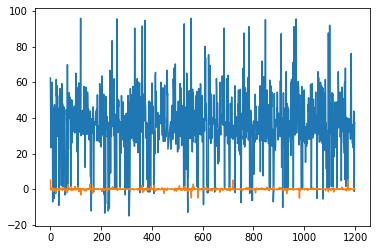

In [37]:
plt.plot(df_ppg_bp_sig[0])
plt.plot(df_ecg_bp_sig[0])

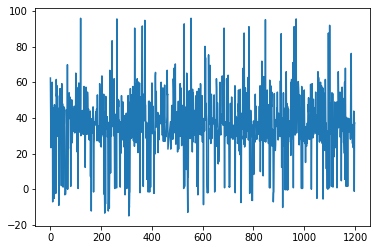

In [38]:
plt.plot(df_ppg_bp_sig[0])

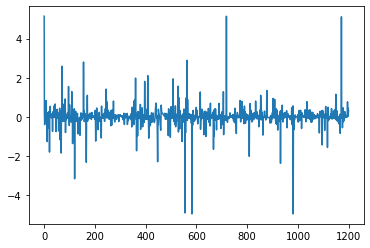

In [39]:
plt.plot(df_ecg_bp_sig[0])

### train test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y_train_ppg = list(df_ppg['label'].map(lambda x : 0 if x == 0 else 1))

* ppg

In [43]:
df_ppg_bp_sig.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,caseid,label
0,62.438301,62.043301,62.438301,61.648300,61.253300,60.463299,59.278400,57.303501,56.513500,54.933601,...,39.529301,38.344299,37.949299,37.159401,36.369400,35.579399,34.789501,33.999500,1.0,-1.0
1,39.924198,42.689098,44.664001,46.638901,49.008801,50.193802,51.773701,53.353699,54.143600,54.933601,...,54.143600,55.328602,56.118500,56.513500,56.118500,56.908501,56.908501,56.908501,1.0,-1.0
2,23.334999,23.729900,24.519899,25.309900,26.494801,28.074800,30.444599,32.814499,35.579399,37.949299,...,52.168701,52.958698,54.933601,56.513500,56.908501,57.303501,58.093399,58.093399,1.0,0.0
3,57.698502,57.303501,55.723499,54.538601,53.353699,51.773701,49.798801,47.823898,45.453999,43.874100,...,60.463299,59.673401,59.278400,57.698502,56.908501,55.328602,53.748600,51.378700,4.0,0.0
4,26.494801,28.074800,30.049700,32.024601,34.394501,37.159401,40.319199,43.479099,47.033901,50.193802,...,56.118500,55.328602,54.143600,52.563702,51.378700,50.193802,47.823898,45.453999,4.0,0.0


In [44]:
df_ppg_bp_sig = df_ppg_bp_sig.reset_index()

In [45]:
df_ppg_bp_sig

,index,0,1,2,3,4,5,6,7,8,...,292,293,294,295,296,297,298,299,caseid,label
0,0,62.438301,62.043301,62.438301,61.648300,61.253300,60.463299,59.278400,57.303501,56.513500,...,39.529301,38.344299,37.949299,37.159401,36.369400,35.579399,34.789501,33.999500,1.0,-1.0
1,1,39.924198,42.689098,44.664001,46.638901,49.008801,50.193802,51.773701,53.353699,54.143600,...,54.143600,55.328602,56.118500,56.513500,56.118500,56.908501,56.908501,56.908501,1.0,-1.0
2,2,23.334999,23.729900,24.519899,25.309900,26.494801,28.074800,30.444599,32.814499,35.579399,...,52.168701,52.958698,54.933601,56.513500,56.908501,57.303501,58.093399,58.093399,1.0,0.0
3,3,57.698502,57.303501,55.723499,54.538601,53.353699,51.773701,49.798801,47.823898,45.453999,...,60.463299,59.673401,59.278400,57.698502,56.908501,55.328602,53.748600,51.378700,4.0,0.0
4,4,26.494801,28.074800,30.049700,32.024601,34.394501,37.159401,40.319199,43.479099,47.033901,...,56.118500,55.328602,54.143600,52.563702,51.378700,50.193802,47.823898,45.453999,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,1195,43.874100,43.084099,42.689098,41.899200,41.504200,40.714199,40.319199,39.924198,39.529301,...,39.924198,39.924198,39.924198,39.529301,39.529301,39.134300,38.739300,38.739300,742.0,0.0
1167,1196,41.504200,41.109200,41.109200,40.714199,40.319199,39.924198,39.134300,39.134300,38.739300,...,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,37.159401,743.0,0.0
1168,1197,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.153980,-1.548960,-1.153980,-1.548960,...,-1.153980,-1.153980,-0.758994,-1.153980,-1.153980,-1.548960,-1.153980,-1.153980,743.0,0.0
1169,1198,36.369400,36.369400,35.974400,35.974400,35.974400,35.974400,35.974400,36.369400,35.974400,...,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,35.579399,743.0,0.0


In [46]:
df_ecg_bp_sig['index'] = np.array(df_ppg_bp_sig['index'])

In [47]:
df_ecg_bp_sig

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,caseid,label,index
0,5.145430,5.145430,5.145430,5.145430,5.145430,5.145430,0.958608,-4.956260,-4.956260,-4.956260,...,-0.344836,0.247639,0.060022,-0.255965,0.405632,-0.344836,0.247639,1.0,-1.0,0
1,0.148893,-0.009100,-0.068348,-0.088097,-0.107846,-0.107846,-0.107846,-0.097971,-0.107846,-0.078222,...,-0.038724,-0.028849,-0.048599,-0.048599,-0.028849,-0.018975,-0.028849,1.0,-1.0,1
2,-0.394209,0.346384,-0.097971,-0.088097,0.356259,-0.404083,0.356259,-0.117721,-0.038724,0.385883,...,5.145430,5.145430,5.145430,5.145430,5.145430,5.145430,5.145430,1.0,0.0,2
3,0.030398,0.040273,0.050147,0.060022,0.069896,0.089645,0.119269,0.148893,0.188391,0.227889,...,0.099520,0.119269,0.139018,0.198266,0.227889,0.277262,0.326635,4.0,0.0,3
4,-0.137470,-0.157219,-0.206592,-0.097971,0.297011,0.682120,0.682120,0.287137,-0.127595,-0.305337,...,0.060022,0.119269,0.148893,0.178517,0.208140,0.208140,0.198266,4.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.770991,0.741367,0.208140,-0.058473,-0.009100,0.069896,0.079771,0.069896,0.060022,0.069896,...,0.099520,0.109395,0.129144,0.148893,0.168642,0.198266,0.227889,742.0,0.0,1195
1196,0.020523,-0.009100,-0.038724,-0.058473,-0.058473,-0.058473,-0.048599,-0.068348,-0.117721,-0.058473,...,0.000774,0.000774,0.000774,0.020523,0.030398,0.040273,0.060022,743.0,0.0,1196
1197,0.040273,-0.186843,-0.078222,0.030398,0.050147,0.030398,0.030398,0.040273,0.050147,0.050147,...,0.553750,0.593248,0.622872,0.632747,0.622872,0.573499,0.484628,743.0,0.0,1197
1198,0.445130,0.464879,0.484628,0.484628,0.474754,0.464879,0.415506,0.346384,0.267388,0.198266,...,0.168642,0.099520,0.050147,0.010649,-0.009100,-0.009100,0.000774,743.0,0.0,1198


In [48]:
train_data_ppg, valid_data_ppg, train_labels_ppg, valid_labels_ppg = train_test_split(
    df_ppg_bp_sig, y_train_ppg, test_size=0.3, random_state=42, stratify=y_train_ppg
)

In [49]:
valid_data_ppg, test_data_ppg, valid_labels_ppg, test_labels_ppg = train_test_split(
    valid_data_ppg, valid_labels_ppg, test_size=0.3, random_state=42, stratify=valid_labels_ppg
)

In [50]:
print(len(train_data_ppg), len(valid_data_ppg), len(test_data_ppg) ,len(train_labels_ppg),len(valid_labels_ppg), len(test_labels_ppg))

819 246 106 819 246 106


In [51]:
train_data_id = list(train_data_ppg['index'])

In [52]:
len(train_data_id)

819

In [53]:
valid_data_id = list(valid_data_ppg['index'])

In [54]:
test_data_id = list(test_data_ppg['index'])

* ecg

In [55]:
y_train_ecg = list(df_ecg['label'].map(lambda x : 0 if x == 0 else 1))

In [56]:
train_data_ecg = df_ecg_bp_sig[df_ecg_bp_sig['index'].map(lambda x : x in train_data_id)]

In [57]:
train_labels_ecg = list(df_ecg_bp_sig[df_ecg_bp_sig['index'].map(lambda x : x in train_data_id)]['label'])

In [58]:
valid_data_ecg = df_ecg_bp_sig[df_ecg_bp_sig['index'].map(lambda x : x in valid_data_id)]

In [59]:
valid_labels_ecg = list(df_ecg_bp_sig[df_ecg_bp_sig['index'].map(lambda x : x in valid_data_id)]['label'])

In [60]:
test_data_ecg = df_ecg_bp_sig[df_ecg_bp_sig['index'].map(lambda x : x in test_data_id)]

In [61]:
test_labels_ecg = list(df_ecg_bp_sig[df_ecg_bp_sig['index'].map(lambda x : x in test_data_id)]['label'])

In [62]:
print(len(train_data_ppg), len(valid_data_ppg), len(test_data_ppg) ,len(train_labels_ppg),len(valid_labels_ppg), len(test_labels_ppg))

819 246 106 819 246 106


In [63]:
print(len(train_data_ecg), len(valid_data_ecg), len(test_data_ecg) ,len(train_labels_ecg),len(valid_labels_ecg), len(test_labels_ecg))

819 246 106 819 246 106


* data set setting

In [64]:
train_data_ppg = train_data_ppg.drop(['index', 'caseid', 'label'], axis =1).values

In [65]:
valid_data_ppg = valid_data_ppg.drop(['index','caseid', 'label'], axis =1).values

In [66]:
test_data_ppg = test_data_ppg.drop(['index','caseid', 'label'], axis =1).values

In [67]:
train_data_ecg = train_data_ecg.drop(['index','caseid', 'label'], axis =1).values

In [68]:
valid_data_ecg = valid_data_ecg.drop(['index','caseid', 'label'], axis =1).values

In [69]:
test_data_ecg = test_data_ecg.drop(['index','caseid', 'label'], axis =1).values

### MinMax Scaling

* ppg

In [71]:
# minmaxnormalization
min_ppg = np.min(np.float32(train_data_ppg))
# max
max_ppg = np.max(np.float32(train_data_ppg))

In [72]:
train_data_ppg = (train_data_ppg - min_ppg) / (max_ppg - min_ppg)
valid_data_ppg = (valid_data_ppg - min_ppg) / (max_ppg - min_ppg)
test_data_ppg = (test_data_ppg - min_ppg) / (max_ppg - min_ppg)

* ecg

In [74]:
# minmaxnormalization
min_ecg = np.min(np.float32(train_data_ecg))
# max
max_ecg = np.max(np.float32(train_data_ecg))

In [75]:
train_data_ecg = (train_data_ecg - min_ecg) / (max_ecg - min_ecg)
valid_data_ecg = (valid_data_ecg - min_ecg) / (max_ecg - min_ecg)
test_data_ecg = (test_data_ecg - min_ecg) / (max_ecg - min_ecg)

#### ppg ecg concat

In [76]:
train_data_ppg.shape

(819, 300)

In [77]:
train_data_ppg.shape

(819, 300)

In [78]:
train_data_ecg.shape

(819, 300)

In [79]:
X_train = [train_data_ppg, train_data_ecg]

In [80]:
X_train = np.asarray(X_train)
y_train = np.asarray(train_labels_ppg)

In [81]:
X_train.shape

(2, 819, 300)

In [82]:
X_train = X_train.reshape(819, 300, 2)

In [83]:
X_valid = [valid_data_ppg, valid_data_ecg]

In [84]:
X_valid = np.asarray(X_valid)
y_valid = np.asarray(valid_labels_ppg)

In [85]:
X_valid.shape

(2, 246, 300)

In [86]:
X_valid = X_valid.reshape(246, 300, 2)

In [87]:
X_test = [test_data_ppg, test_data_ecg]

In [88]:
X_test = np.asarray(X_test)
y_test = np.asarray(test_labels_ppg)

In [89]:
X_test.shape

(2, 106, 300)

In [90]:
X_test = X_test.reshape(106, 300, 2)

In [91]:
X_test.shape

(106, 300, 2)

In [106]:
def ohe(x):
    if x == 0:
        k = [0, 1]
    else:
        k = [1, 0]
        return k

In [107]:
y_test_ohe = []
for i in y_test:
    if i == 0:
        y_test_ohe.append([0, 1])
    else:
        y_test_ohe.append([1, 0])

In [108]:
y_train_ohe = []
for i in y_train:
    if i == 0:
        y_train_ohe.append([0, 1])
    else:
        y_train_ohe.append([1, 0])

In [109]:
y_valid_ohe = []
for i in y_valid:
    if i == 0:
        y_valid_ohe.append([0, 1])
    else:
        y_valid_ohe.append([1, 0])

In [117]:
y_train_ohe = np.asarray(y_train_ohe)

In [118]:
y_valid_ohe = np.asarray(y_valid_ohe)

In [119]:
y_test_ohe = np.asarray(y_test_ohe)

#### model

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout, Conv1D, GlobalMaxPooling1D, Dense, BatchNormalization, ReLU, MaxPool1D, Flatten, LSTM, TimeDistributed, Softmax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import layers

In [132]:
model = Sequential()
# conv1
model.add(Conv1D(512, 32, padding='valid', strides=1,input_shape=(300, 2)))
#model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv1D(512, 32, padding='valid', strides=1,input_shape=(300, 2)))
model.add(ReLU())
model.add(Dropout(0.2))

model.add(Conv1D(512, 32, padding='valid', strides=1,input_shape=(300, 2)))
#model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv1D(512, 32, padding='valid', strides=1,input_shape=(300, 2)))
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.2))

# conv2
model.add(Conv1D(64, 8, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv3
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv4
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv5
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))


# conv5
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

model.add(GlobalMaxPooling1D())
model.add(Dense(320))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Softmax(axis=-1))

In [133]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_63 (Conv1D)          (None, 269, 512)          33280     
                                                                 
 re_lu_63 (ReLU)             (None, 269, 512)          0         
                                                                 
 conv1d_64 (Conv1D)          (None, 238, 512)          8389120   
                                                                 
 re_lu_64 (ReLU)             (None, 238, 512)          0         
                                                                 
 dropout_56 (Dropout)        (None, 238, 512)          0         
                                                                 
 conv1d_65 (Conv1D)          (None, 207, 512)          8389120   
                                                                 
 re_lu_65 (ReLU)             (None, 207, 512)         

In [134]:
'''import tensorflow as tf
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)'''

'import tensorflow as tf\ninitial_learning_rate = 0.001\nlr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(\n    initial_learning_rate,\n    decay_steps=100000,\n    decay_rate=0.96,\n    staircase=True)'

In [135]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

In [136]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

In [137]:
history = model.fit(X_train, y_train_ohe, batch_size = 16, epochs=200, validation_data=(X_valid, y_valid_ohe))

Epoch 1/200
52/52 [==============================] - 2s 20ms/step - loss: 0.7741 - acc: 0.7521 - val_loss: 0.5345 - val_acc: 0.8455
Epoch 2/200
52/52 [==============================] - 1s 18ms/step - loss: 0.7874 - acc: 0.7595 - val_loss: 0.4766 - val_acc: 0.8455
Epoch 3/200
52/52 [==============================] - 1s 18ms/step - loss: 0.7006 - acc: 0.7802 - val_loss: 0.4511 - val_acc: 0.8455
Epoch 4/200
52/52 [==============================] - 1s 18ms/step - loss: 0.6912 - acc: 0.7607 - val_loss: 0.4336 - val_acc: 0.8455
Epoch 5/200
52/52 [==============================] - 1s 18ms/step - loss: 0.7083 - acc: 0.7839 - val_loss: 0.4305 - val_acc: 0.8455
Epoch 6/200
52/52 [==============================] - 1s 18ms/step - loss: 0.6321 - acc: 0.7753 - val_loss: 0.4332 - val_acc: 0.8455
Epoch 7/200
52/52 [==============================] - 1s 18ms/step - loss: 0.7114 - acc: 0.7814 - val_loss: 0.4327 - val_acc: 0.8455
Epoch 8/200
52/52 [==============================] - 1s 18ms/step - loss: 0.

KeyboardInterrupt: 

: 

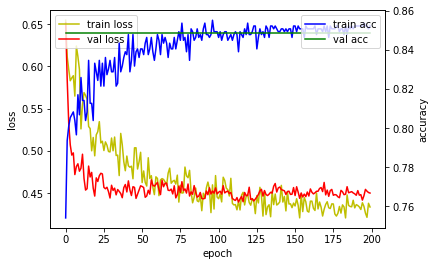

In [71]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()